In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [2]:
from pyspark.sql.types import *
from pyspark.sql.functions import concat, col, udf
data_schema = [
               
               StructField('gender', StringType(), True),
               StructField('race/ethnicity', StringType(), True),
               StructField('parental level of education', StringType(), True),
               StructField('lunch', StringType(), True),
               StructField('test preparation course', StringType(), True),
               StructField('math score', IntegerType(), True),
               StructField('reading score', IntegerType(), True),
               StructField('writing score', IntegerType(), True),
            ]
final_struct = StructType(fields = data_schema)
data = spark.read.csv(
    'StudentsPerformance.csv',
    sep=',',
    header=True,
    schema=final_struct
)

data.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     

In [3]:
udf_space = udf(lambda x: x + ' ' ,StringType() )

df = data.withColumnRenamed('race/ethnicity', 'race').withColumnRenamed('parental level of education', 'level').withColumn('race', udf_space('race'))
df = df.withColumn('type', concat(df.race,df.gender).alias('type'))
df = df.filter(col('level') == "master's degree")
df = df.select(['type', 'level','math score', 'reading score', 'writing score']).groupBy('type', 'level').mean()
df = df.sort(df.type.desc())
df.show()


+--------------+---------------+-----------------+------------------+------------------+
|          type|          level|  avg(math score)|avg(reading score)|avg(writing score)|
+--------------+---------------+-----------------+------------------+------------------+
|  group E male|master's degree|             90.0|              85.0|              84.0|
|group E female|master's degree|72.42857142857143| 81.71428571428571|              80.0|
|  group D male|master's degree|           83.625|            81.375|             81.25|
|group D female|master's degree|             66.6| 74.93333333333334| 78.93333333333334|
|  group C male|master's degree|             70.0|             68.25| 67.66666666666667|
|group C female|master's degree|             62.0| 74.42857142857143| 72.71428571428571|
|  group B male|master's degree|             49.0|              53.0|              52.0|
|group B female|master's degree|             70.8|              85.6|              82.2|
|  group A male|maste

In [4]:
from matplotlib import pyplot as plt

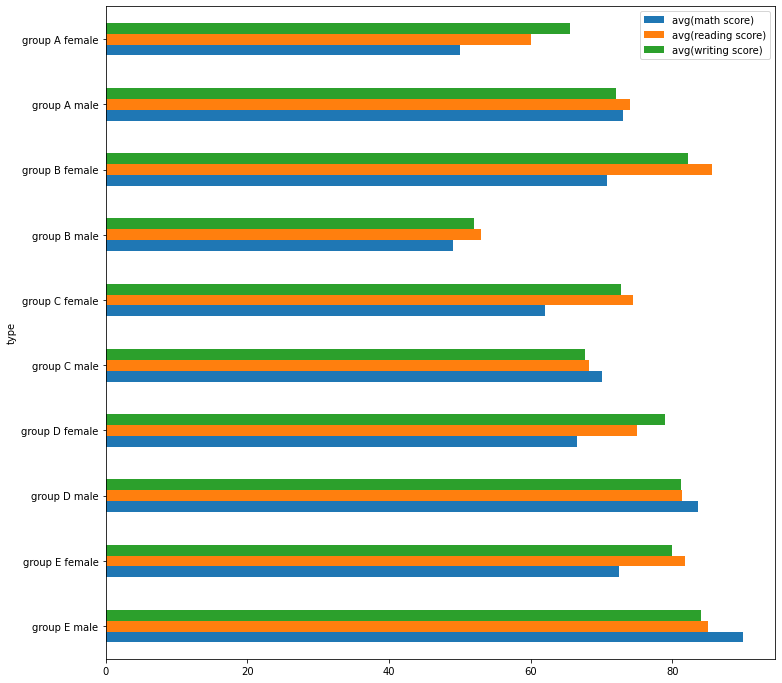

In [5]:
df2_for_plot = df.toPandas()
df2_for_plot.plot(kind='barh', x='type', y=df2_for_plot.columns.tolist()[2:], figsize=(12, 12), ylabel='scores', xlabel='type')
plt.show()